<h1>Movie Recommender</h1>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

<h3>Read Data</h3>

In [98]:
data = pd.read_csv('netflix_titles.csv')

In [99]:
data.shape

(6234, 12)

In [100]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [101]:
netflix = data[['title', 'release_year', 'rating', 'listed_in', 'description']] #useful columns
netflix.head()

,title,release_year,rating,listed_in,description
0,Norm of the North: King Sized Adventure,2019,TV-PG,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,2016,TV-MA,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,2013,TV-Y7-FV,Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,2016,TV-Y7,Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,2017,TV-14,Comedies,When nerdy high schooler Dani finally attracts...


In [102]:
netflix.isna().sum()

title            0
release_year     0
rating          10
listed_in        0
description      0
dtype: int64

In [103]:
netflix.dropna()
netflix.head()

,title,release_year,rating,listed_in,description
0,Norm of the North: King Sized Adventure,2019,TV-PG,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,2016,TV-MA,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,2013,TV-Y7-FV,Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,2016,TV-Y7,Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,2017,TV-14,Comedies,When nerdy high schooler Dani finally attracts...


<h3>Encode ratings</h3>

In [104]:
netflix.rating.value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [105]:
dict_rating = {'TV-MA': 0, 'TV-14':1, 'R':2, 'TV-PG':3, 'PG-13':4, 'NR':5, 'PG':6,
              'TV-G':7, 'TV-Y7':8, 'TV-Y':9, 'G':10, 'TV-Y7-FV':11, 'UR':12, 'NC-17':13}
netflix.replace({'rating': dict_rating}, inplace = True)

In [106]:
netflix.head()

,title,release_year,rating,listed_in,description
0,Norm of the North: King Sized Adventure,2019,3.0,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,2016,0.0,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,2013,11.0,Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,2016,8.0,Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,2017,1.0,Comedies,When nerdy high schooler Dani finally attracts...


<h3>Clean text features</h3>

In [107]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english') + list(punctuation))
#stop_words = set(stopwords.words('english')) 
#stopwords_list = set(stopwords.words('english') + list(punctuation))

netflix['description'] = netflix['description'].str.lower()
netflix['description'] = netflix['description'].apply(word_tokenize)
netflix['description'] = netflix['description'].apply(lambda x: [word for word in x if word not in stop_words])
netflix['description'] = netflix['description'].apply(lambda x : [word for word in x if len(word) > 0])
netflix['description'] = netflix['description'].apply(lambda x : list(set(x)))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/CaitlanKrasinski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/CaitlanKrasinski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


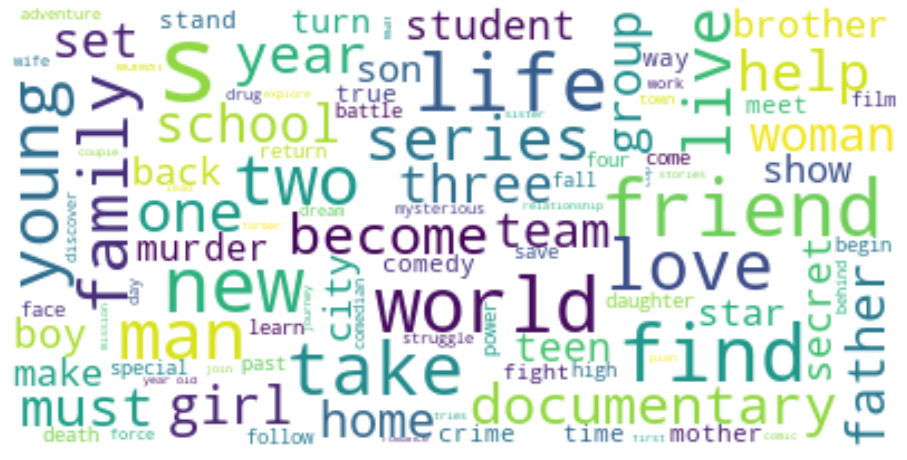

In [108]:
from wordcloud import WordCloud
import itertools

#wordcloud for description

descr = netflix['description'].tolist()
descr = list(itertools.chain(*descr))
description = ' '.join(descr)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(description)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [109]:
netflix['listed_in'] = netflix['listed_in'].str.lower()
netflix['listed_in'] = netflix['listed_in'].apply(word_tokenize)
netflix['listed_in'] = netflix['listed_in'].apply(lambda x: [word for word in x if word not in stop_words])
netflix['listed_in'] = netflix['listed_in'].apply(lambda x : list(set(x)))

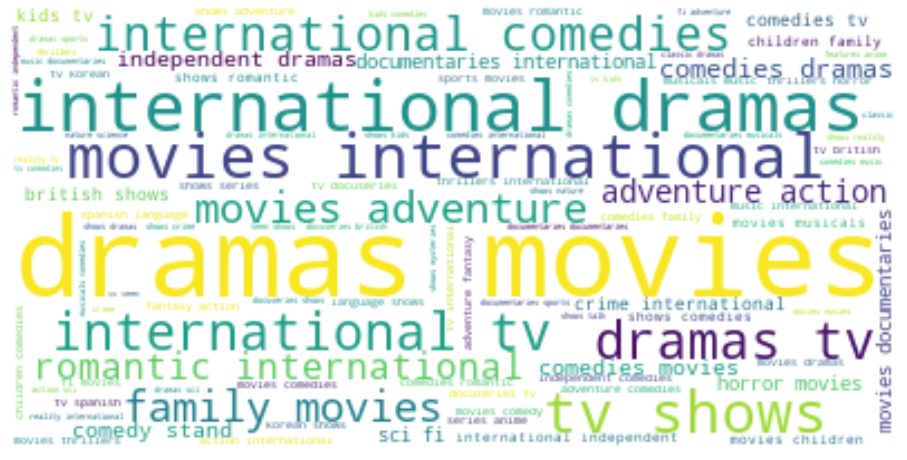

In [110]:
#wordcloud for genres

listed = netflix['listed_in'].tolist()
listed = list(itertools.chain(*listed))
listed_in = ' '.join(listed)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(listed_in)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [111]:
netflix.head()

,title,release_year,rating,listed_in,description
0,Norm of the North: King Sized Adventure,2019,3.0,"[children, comedies, family, movies]","[polar, artifact, evil, stolen, archaeologist,..."
1,Jandino: Whatever it Takes,2016,0.0,"[comedy, stand-up]","[serenades, riffs, fire, ``, jandino, comedy, ..."
2,Transformers Prime,2013,11.0,"[kids, tv]","[help, earth, onslaught, decepticons, three, h..."
3,Transformers: Robots in Disguise,2016,8.0,"[kids, tv]","[protect, ship, prison, earth, humankind, cras..."
4,#realityhigh,2017,1.0,[comedies],"[celebrity, finally, hairs, cross, media, land..."


In [112]:
#unlist text features
netflix['description'] = netflix.description.apply(lambda x: ' '.join([str(i) for i in x]))
netflix['listed_in'] = netflix.listed_in.apply(lambda x: ' '.join([str(i) for i in x]))
netflix.head()

,title,release_year,rating,listed_in,description
0,Norm of the North: King Sized Adventure,2019,3.0,children comedies family movies,polar artifact evil stolen archaeologist first...
1,Jandino: Whatever it Takes,2016,0.0,comedy stand-up,serenades riffs fire `` jandino comedy challen...
2,Transformers Prime,2013,11.0,kids tv,help earth onslaught decepticons three human l...
3,Transformers: Robots in Disguise,2016,8.0,kids tv,protect ship prison earth humankind crash forc...
4,#realityhigh,2017,1.0,comedies,celebrity finally hairs cross media lands dani...


In [113]:
#combine all words from text features together 
netflix['all_words'] = netflix.listed_in + ' ' + netflix.description
netflix.head()

,title,release_year,rating,listed_in,description,all_words
0,Norm of the North: King Sized Adventure,2019,3.0,children comedies family movies,polar artifact evil stolen archaeologist first...,children comedies family movies polar artifact...
1,Jandino: Whatever it Takes,2016,0.0,comedy stand-up,serenades riffs fire `` jandino comedy challen...,comedy stand-up serenades riffs fire `` jandin...
2,Transformers Prime,2013,11.0,kids tv,help earth onslaught decepticons three human l...,kids tv help earth onslaught decepticons three...
3,Transformers: Robots in Disguise,2016,8.0,kids tv,protect ship prison earth humankind crash forc...,kids tv protect ship prison earth humankind cr...
4,#realityhigh,2017,1.0,comedies,celebrity finally hairs cross media lands dani...,comedies celebrity finally hairs cross media l...


<h3>Word features - Vectorizer</h3>

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() 
features = vectorizer.fit_transform(netflix['all_words'])
features.shape

(6234, 16331)

<h3>kmeans model</h3>

clusters of most similar movies based on their description and genres

In [115]:
kmeans = KMeans(n_clusters=200)
kmeans.fit(features)
pred=kmeans.predict(features)

In [116]:
pred

array([182,   7, 175, ...,  30, 142,  93], dtype=int32)

In [117]:
pd.Series(pred).value_counts()

53     123
31      91
115     87
79      86
76      84
      ... 
0       13
129     10
55      10
3        9
33       8
Length: 200, dtype: int64

In [118]:
kmeans.inertia_

5726.487984220593

In [119]:
kmeans.score(features)

-5726.487984220593

In [120]:
netflix['cluster'] = pred

In [121]:
netflix.head()

,title,release_year,rating,listed_in,description,all_words,cluster
0,Norm of the North: King Sized Adventure,2019,3.0,children comedies family movies,polar artifact evil stolen archaeologist first...,children comedies family movies polar artifact...,182
1,Jandino: Whatever it Takes,2016,0.0,comedy stand-up,serenades riffs fire `` jandino comedy challen...,comedy stand-up serenades riffs fire `` jandin...,7
2,Transformers Prime,2013,11.0,kids tv,help earth onslaught decepticons three human l...,kids tv help earth onslaught decepticons three...,175
3,Transformers: Robots in Disguise,2016,8.0,kids tv,protect ship prison earth humankind crash forc...,kids tv protect ship prison earth humankind cr...,175
4,#realityhigh,2017,1.0,comedies,celebrity finally hairs cross media lands dani...,comedies celebrity finally hairs cross media l...,79


In [122]:
#Example output
netflix.loc[netflix['cluster'] == 24].title

149                                                 Hilda
204                                             The Witch
434                                 StoryBots Super Songs
786                       Charlie's Angels: Full Throttle
1011                                   Green Eggs and Ham
1017                                     The Sea of Trees
1327                                           Submission
1493                                     Yeh Hai Bakrapur
2121                                             Dear Dad
2403                                          Beary Tales
2495                                  Acapulco La vida va
2668                                                 Jinn
2955                               Grizzy et les Lemmings
3033             DreamWorks Kung Fu Panda Awesome Secrets
3535        Legend of the Guardians: The Owls of Ga'Hoole
3967                                                Sakhi
4085                           A Family Reunion Christmas
4399          